# Classify messages with Naive Baye's

* Using practical side of Naive Baye's algorithm by building a spam filter for SMS messages.
* Dataset can be downloaded from: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
       

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read SMS dataset and explore.

In [93]:
import numpy as np
import pandas as df
sms_data = df.read_csv("SMSSpamCollection", sep='\t', header=None, names =['Label', 'SMS'])
sms_data.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
sms_data.shape

(5572, 2)

In [95]:
sms_data.isnull().any()

Label    False
SMS      False
dtype: bool

In [96]:
# percentage of smap amd ham messages in full dataset
sms_data['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

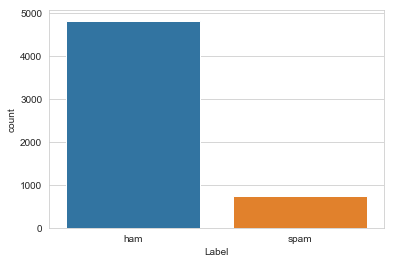

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='Label', data=sms_data)
plt.show()

## Split Training and Test Set
* Split  dataset into a training and a test set, where the training set accounts for 80% of the data, and the test set for the remaining 20%

In [98]:
sms_rand = sms_data.sample(frac=1, random_state=1)

In [99]:
training_test_index = round(len(sms_rand) * 0.8)


training_set = sms_rand[:training_test_index].reset_index(drop=True)
test_set = sms_rand[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


Full dataset has about 87% of ham messages and 13% are spam messages.

I will check just split datasets, to see percentages of spam and ham messages in the training and test sets. I expect the percentages to be close to what we have in the full dataset.

In [100]:
training_set['Label'].value_counts(normalize=True)

ham     0.86541
spam    0.13459
Name: Label, dtype: float64

In [101]:
test_set['Label'].value_counts(normalize=True)

ham     0.868043
spam    0.131957
Name: Label, dtype: float64

In [102]:
test_set.head()

,Label,SMS
0,ham,Later i guess. I needa do mcat study too.
1,ham,But i haf enuff space got like 4 mb...
2,spam,Had your mobile 10 mths? Update to latest Oran...
3,ham,All sounds good. Fingers . Makes it difficult ...
4,ham,"All done, all handed in. Don't know if mega sh..."


 My dataset split looks good, I can move on next step.

## Data cleaning:
* Begin with removing all the punctuation and bringing every letter to lower case

In [103]:
training_set['SMS'] = training_set['SMS'].str.replace('\W', ' ')
training_set['SMS'] = training_set['SMS'].str.lower()
training_set.head()

,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired
3,ham,havent
4,ham,i forgot 2 ask ü all smth there s a card on ...


* Create a vocabulary a list of all unique words in training set

In [104]:
training_set['SMS']=training_set['SMS'].str.split()

vocab = []
for sms in training_set['SMS']:
    for word in sms:
        vocab.append(word)
vocab = list(set(vocab))
    

In [105]:
len(vocab)

7783

* Use vocabulary just created for data transformation required for analysis

In [106]:
word_counts_per_sms = {unique_word: [0] * len(training_set['SMS']) for unique_word in vocab}

for index, sms in enumerate(training_set['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] += 1

In [107]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,cm2,08717111821,throw,winning,corporation,yan,lotsof,tddnewsletter,71,ibm,...,asp,nino,latelyxxx,expects,randomlly,latr,08712405022,suzy,wa,parked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Concat dataset just created with original training set.

In [108]:
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.tail()

,Label,SMS,cm2,08717111821,throw,winning,corporation,yan,lotsof,tddnewsletter,...,asp,nino,latelyxxx,expects,randomlly,latr,08712405022,suzy,wa,parked
4453,ham,"[sorry, i, ll, call, later, in, meeting, any, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,ham,"[babe, i, fucking, love, you, too, you, know, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4455,spam,"[u, ve, been, selected, to, stay, in, 1, of, 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4456,ham,"[hello, my, boytoy, geeee, i, miss, you, alrea...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4457,ham,"[wherre, s, my, boytoy]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculate constants
 
 * I will use Laplace smoothing and set $\alpha = 1$
 * calculate parameters

In [169]:
spam_messages = training_set_clean[training_set_clean['Label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Label']== 'ham']

p_spam = len(spam_messages)/len(training_set_clean)
p_ham = len(ham_messages)/ len(training_set_clean)

n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()


n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()


n_vocab = len(vocab)


alpha = 1

In [170]:
parameters_spam = {unique_word:0 for unique_word in vocab}
parameters_ham = {unique_word:0 for unique_word in vocab}

for word in vocab:
    n_word_given_spam = spam_messages[word].sum()   
    p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocab)
    parameters_spam[word] = p_word_given_spam
    
    n_word_given_ham = ham_messages[word].sum()   
    p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocab)
    parameters_ham[word] = p_word_given_ham

## Classifying A New Message
* Create a classifier (a function to classify a new message).

In [171]:
import re

def classify(message):
       
    message = re.sub('\W', ' ', message)
    message = message.lower().split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
            
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]
            
    print('P(Spam|message):', p_spam_given_message)
    print('P(Ham|message):', p_ham_given_message)
    
    if p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    elif p_ham_given_message < p_spam_given_message:
        print('Label: Spam')
    else:
        print('Equal proabilities, human may classify this!')

* Test that classifier/filter on new messages.

In [172]:
classify('WINNER!! This is the secret code to  money.')

P(Spam|message): 1.9601625317988245e-23
P(Ham|message): 1.3673295850585383e-25
Label: Spam


In [173]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 2.4372375665888117e-25
P(Ham|message): 3.687530435009238e-21
Label: Ham


* Run that spam filter on test_set to see: how it works on.

In [174]:
def classify_test_set(message):    
        
    message = re.sub('\W', ' ', message)
    message = message.lower().split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
            
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]
    
    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_spam_given_message > p_ham_given_message:
        return 'spam'
    else:
        return 'needs human classification'

In [175]:
test_set['predicted'] = test_set['SMS'].apply(classify_test_set)
test_set.head()

,Label,SMS,predicted,prediction_true_false
0,ham,Later i guess. I needa do mcat study too.,ham,True
1,ham,But i haf enuff space got like 4 mb...,ham,True
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam,True
3,ham,All sounds good. Fingers . Makes it difficult ...,ham,True
4,ham,"All done, all handed in. Don't know if mega sh...",ham,True


* Measure the accuracy of the spam filter created.

In [176]:
correct = 0
total = test_set.shape[0]
    
for row in test_set.iterrows():
    row = row[1]
    if row['Label'] == row['predicted']:
        correct += 1
        
print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

Correct: 1100
Incorrect: 14
Accuracy: 0.9874326750448833


# This filter classifies the messages as spam or ham with 98.7% accuracy.

### How to improve accuracy further?

* Analyze those 14 messages that were classified incorrectly and try to figure out why algorithm classified them incorrectly?
* Make the filtering process more complex by making the algorithm sensitive to letter case             


In [177]:
test_set1 = test_set
# copy test set to analyze it further
test_set.head()

,Label,SMS,predicted,prediction_true_false
0,ham,Later i guess. I needa do mcat study too.,ham,True
1,ham,But i haf enuff space got like 4 mb...,ham,True
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam,True
3,ham,All sounds good. Fingers . Makes it difficult ...,ham,True
4,ham,"All done, all handed in. Don't know if mega sh...",ham,True


In [178]:
test_set1['prediction_true_false'] = test_set1['Label'] == test_set1['predicted']
# add a column in test_set1 to save accuracy of filter, titled prediction_true_false.

In [179]:
test_set1.head()

,Label,SMS,predicted,prediction_true_false
0,ham,Later i guess. I needa do mcat study too.,ham,True
1,ham,But i haf enuff space got like 4 mb...,ham,True
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam,True
3,ham,All sounds good. Fingers . Makes it difficult ...,ham,True
4,ham,"All done, all handed in. Don't know if mega sh...",ham,True


In [180]:
test_set_wrong = test_set1[test_set1.prediction_true_false == False]
test_set_wrong
# these messages were identified incorrectly

,Label,SMS,predicted,prediction_true_false
114,spam,Not heard from U4 a while. Call me now am here...,ham,False
135,spam,More people are dogging in your area now. Call...,ham,False
152,ham,Unlimited texts. Limited minutes.,spam,False
159,ham,26th OF JULY,spam,False
284,ham,Nokia phone is lovly..,spam,False
293,ham,A Boy loved a gal. He propsd bt she didnt mind...,needs human classification,False
302,ham,No calls..messages..missed calls,spam,False
319,ham,We have sent JD for Customer Service cum Accou...,spam,False
504,spam,Oh my god! I've found your number again! I'm s...,ham,False
546,spam,"Hi babe its Chloe, how r u? I was smashed on s...",ham,False


In [222]:
a_r = [0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8]
alp=[]
err=[]
for i in  (list(a_r)):
    alpha = i
    
    parameters_spam = {unique_word:0 for unique_word in vocab}
    parameters_ham = {unique_word:0 for unique_word in vocab}
    
    for word in vocab:
        n_word_given_spam = spam_messages[word].sum()   
        p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocab)
        parameters_spam[word] = p_word_given_spam
    
        n_word_given_ham = ham_messages[word].sum()   
        p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocab)
        parameters_ham[word] = p_word_given_ham
    
    test_set['predicted'] = test_set['SMS'].apply(classify_test_set)
#test_set.head()
    
    correct = 0
    total = test_set.shape[0]
    
    for row in test_set.iterrows():
        row = row[1]
        if row['Label'] == row['predicted']:
            correct += 1
    print('Alpha:', alpha)
    alp.append(alpha)
    print('Correct:', correct)
    print('Incorrect:', total - correct)
    print('Accuracy:', correct/total)
    err.append(100-(correct/total)*100)

Alpha: 0.2
Correct: 1099
Incorrect: 15
Accuracy: 0.9865350089766607
Alpha: 0.4
Correct: 1100
Incorrect: 14
Accuracy: 0.9874326750448833
Alpha: 0.6
Correct: 1101
Incorrect: 13
Accuracy: 0.9883303411131059
Alpha: 0.8
Correct: 1101
Incorrect: 13
Accuracy: 0.9883303411131059
Alpha: 1.0
Correct: 1100
Incorrect: 14
Accuracy: 0.9874326750448833
Alpha: 1.2
Correct: 1100
Incorrect: 14
Accuracy: 0.9874326750448833
Alpha: 1.4
Correct: 1097
Incorrect: 17
Accuracy: 0.9847396768402155
Alpha: 1.6
Correct: 1096
Incorrect: 18
Accuracy: 0.9838420107719928
Alpha: 1.8
Correct: 1093
Incorrect: 21
Accuracy: 0.981149012567325


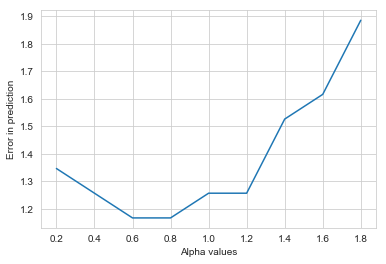

In [224]:
sns.lineplot(alp, err)
plt.xlabel('Alpha values')
plt.ylabel('Error in prediction')
plt.show()

* As per error plot above, alpha = 0.6 and alpha=0.8 gives best accuracy possible.
* Filter with value of alpha = 0.8, classifies messages as spam or ham with 98.8% accuracy. 

## Here, Lidstone smoothing gives better result than Laplace smoothing.